In [1]:
from __init__ import *

In [2]:
config = reload_config("conf.yaml")
columns = config['columns']
seed: int = config['seed']

In [3]:
X, y = read.read_x_and_y(u".\spam.csv")
print(y[: 5])
print(X[2: 3])
print(len(X), len(y))

[1 0 0 1 0]
['Ok lar Joking wif u oni']
5575 5575


In [4]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X)
X_train.shape

(5575, 8605)

In [5]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train)
X_train_tf = tf_transformer.transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_train_tfidf.shape

(5575, 8605)

In [6]:
data = X_train_tfidf
print(data[1: 2])

  (0, 8347)	0.22473179099275264
  (0, 8093)	0.18581311333002104
  (0, 7841)	0.22960295284924395
  (0, 7404)	0.16172359018914664
  (0, 5548)	0.2548886331714157
  (0, 5131)	0.15627437346164308
  (0, 3936)	0.26716298074304856
  (0, 3780)	0.3258745122814397
  (0, 3492)	0.10740004091885813
  (0, 2969)	0.18138592683933122
  (0, 2930)	0.15278163920465293
  (0, 2873)	0.1473400121007295
  (0, 1567)	0.2523718059493552
  (0, 1284)	0.2753031516370962
  (0, 952)	0.2753031516370962
  (0, 950)	0.3110833374877464
  (0, 491)	0.24780591387099948
  (0, 249)	0.3258745122814397


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=11)


In [8]:
def make_worker(*args):
    return Worker(seed, columns, X_train, X_test, y_train, y_test, *args)

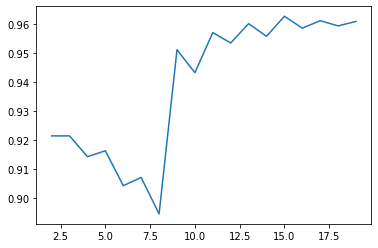

Best kernel =  15
Best score =  0.9628395694515633
classifier 	 =  KNeighborsClassifier
False positive error 	 =  0.001195457262402869
True negative error 	 =  0.04064554692169755
False negative 	 =  0.9986225895316805
True positive 	 =  0.6923076923076923
TIME 	 =  0:00:00.218378


In [9]:
make_worker(range(2, 20), lambda k: KNeighborsClassifier(n_neighbors=k)).all_in_one("KNeighborsClassifier")

C:\Python\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Python\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Python\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Python\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Python\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Python\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Python\lib\site-packages\sklearn\naive_bayes.py:555: Us

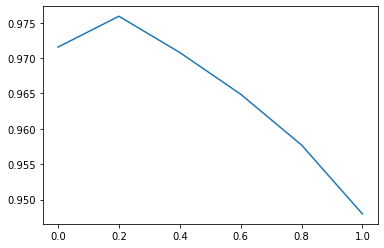

Best kernel =  0.2
Best score =  0.9759097898513582
classifier 	 =  MultinomialNB
False positive error 	 =  0.010161386730424387
True negative error 	 =  0.016138673042438732
False negative 	 =  0.9882920110192838
True positive 	 =  0.8778280542986425
TIME 	 =  0:00:00


In [10]:
C = config['MultinomialNB']
make_worker(C, lambda k: MultinomialNB(alpha=k, class_prior=None, fit_prior=True)).all_in_one("MultinomialNB")

In [ ]:
from sklearn.linear_model import LogisticRegression

C = config['LogisticRegression']
print("l1 penalty")
worker = make_worker(C, lambda k: LogisticRegression(C=k))
accuracy, best_k, best_score = worker.calc_accuracy()
plot_accuracy(C, accuracy, best_k, best_score)

print("---------------------------------------------------")
print("l2 penalty")
make_worker(C, lambda k: LogisticRegression(C=k, penalty="l2")).all_in_one("LogisticRegression")


l1 penalty


In [ ]:
C = np.arange(2, 50, 5)

make_worker(C, lambda k: DecisionTreeClassifier(max_depth=k)).all_in_one("DecisionTreeClassifier")

In [ ]:
C = config['SVC']

worker = make_worker(C, lambda k: SVC(kernel=k))
accuracy, best_k, best_score = worker.calc_accuracy()
accuracy.insert(0, 0)
plot_accuracy(np.arange(len(C) + 1), accuracy, best_k, best_score, 'ro')
worker.calc_and_print(best_k, 'SVC')